# Stock Market News Analysis

In [2]:
# Import Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk


In [3]:
# Import data 
def load_data(filepath):
    df = pd.read_csv(filepath)
    return df


In [4]:
# import 
sentimental_data = load_data(r"C:\Users\liulj\Desktop\KAIM\Stock-Market-Analysis\data\raw\raw_analyst_ratings.csv")
sentimental_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Explore Data

In [5]:
sentimental_data.shape

(1407328, 6)

In [6]:
sentimental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [7]:
sentimental_data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [8]:
# Check missing Value
sentimental_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

**Count Number of Publisher companies**

To know which publisher publish more

In [15]:
publisher_counts = sentimental_data["publisher"].value_counts()
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

**Visualize Publisher**

C:\Users\liulj\AppData\Local\Temp\ipykernel_33172\2906766915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publisher.values, y=top_publisher.index, palette="viridis")


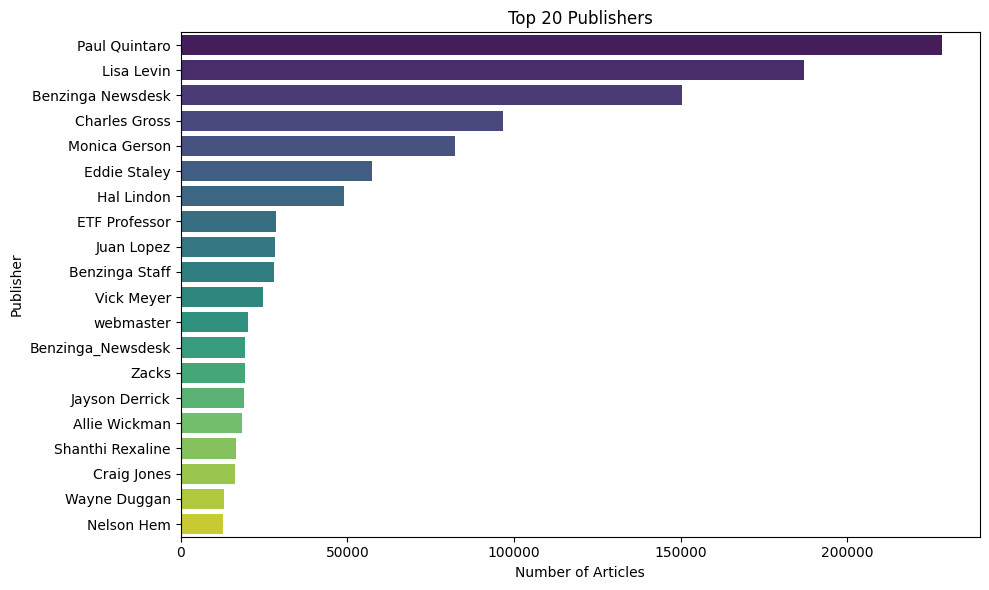

In [26]:
# Visualize top 20 publisher
top_publisher = publisher_counts.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publisher.values, y=top_publisher.index, palette="viridis")
plt.title("Top 20 Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

**Count Number of Stock**

In [14]:
stock_counts = sentimental_data["stock"].value_counts()
stock_counts

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64

**Visualize Stock**

C:\Users\liulj\AppData\Local\Temp\ipykernel_33172\202376184.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stock.values, y=top_stock.index, palette="viridis")


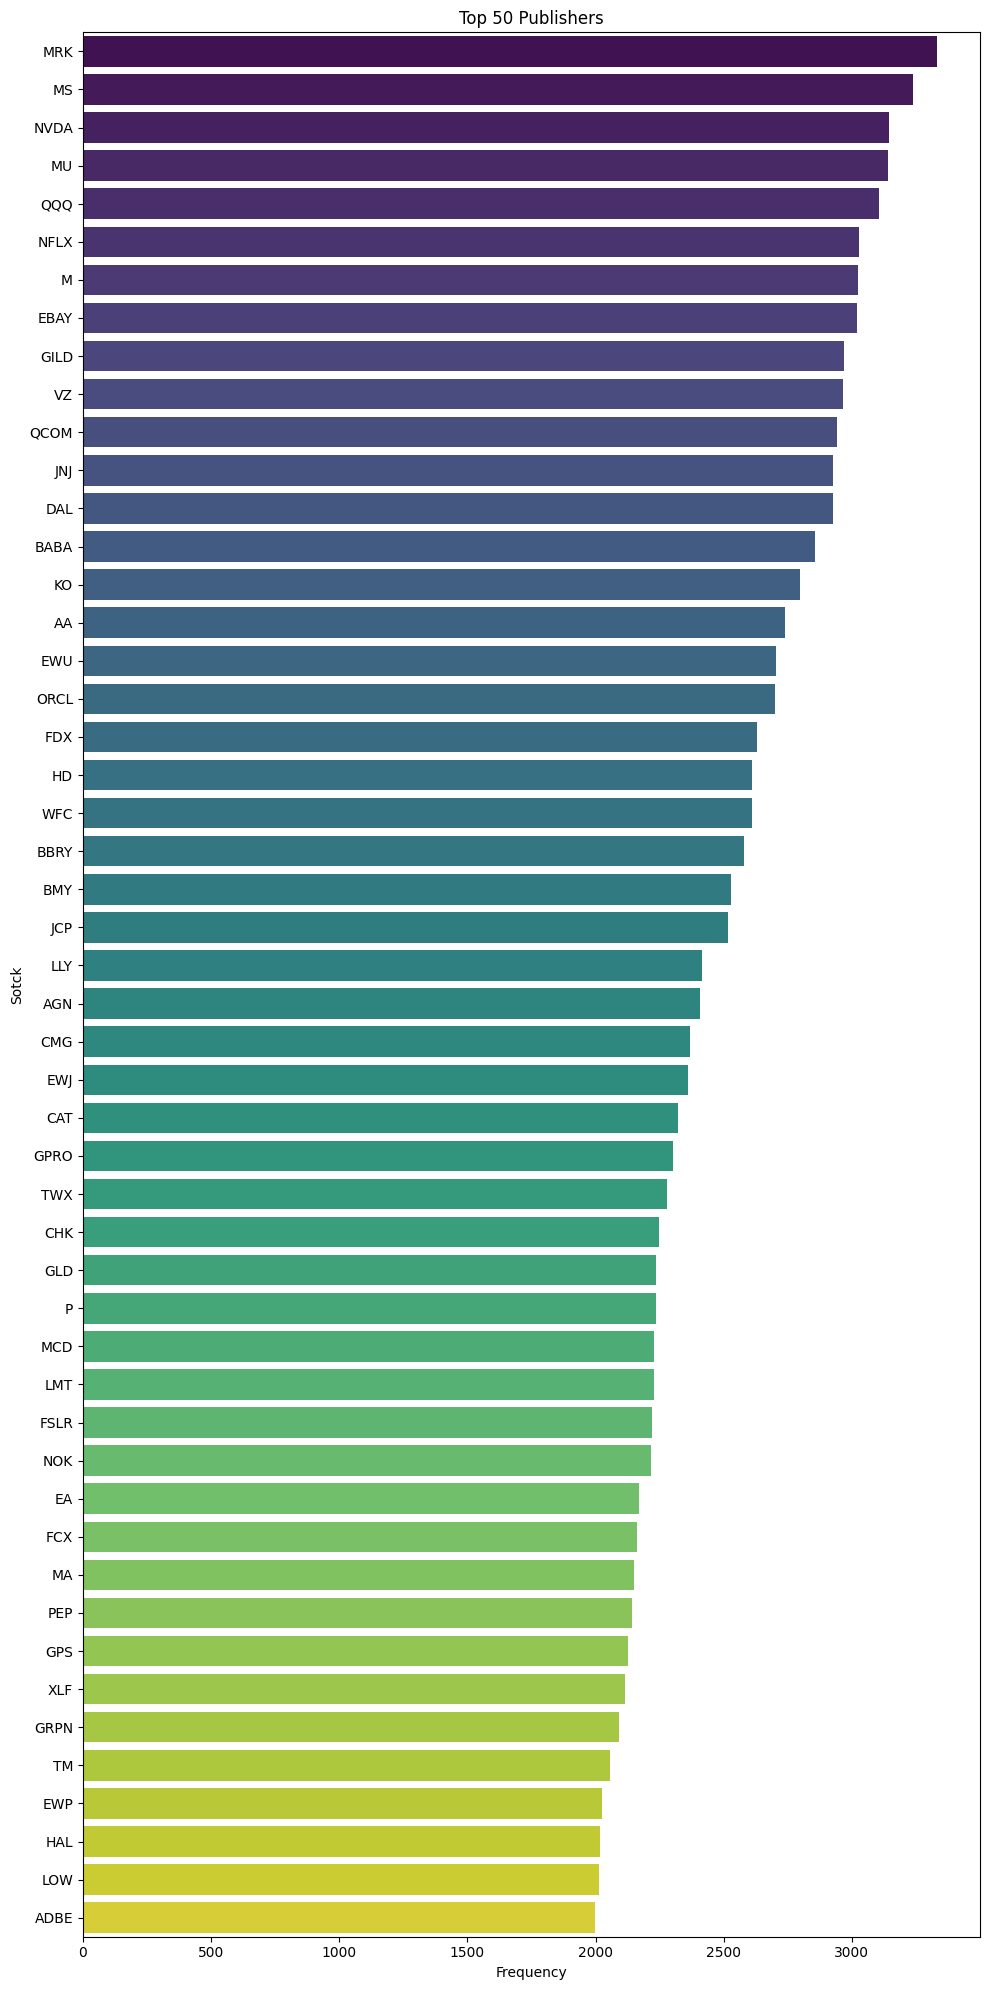

In [25]:
# Visualive top 50 stock
# Visualize top 50 publisher
top_stock = stock_counts.head(50)
plt.figure(figsize=(10, 20))
sns.barplot(x=top_stock.values, y=top_stock.index, palette="viridis")
plt.title("Top 50 Publishers")
plt.xlabel("Frequency")
plt.ylabel("Sotck")
plt.tight_layout()
plt.show()

In [ ]:
# Sentiment Analysis
def sentiment_analysis(df):
    """Performs sentiment analysis on headlines."""
    sia = SentimentIntensityAnalyzer()
    df['sentiment'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

    sentiment_counts = df['sentiment_category'].value_counts()
    print("\nSentiment Analysis Results:\n", sentiment_counts)

    # Plot sentiment distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='sentiment_category', palette='coolwarm')
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    return df
